Assignment 1
Name:Mengting Yang
Data: Stock price of Oracle Corporation
Data Link: https://finance.yahoo.com/quote/ORCL/history?p=ORCL    

In [2]:
#import part
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from datetime import datetime

# Make plots larger


In [3]:
orcl = pd.read_csv("orcl.csv", sep=',')
orcl.head(10)

,Date,Open,High,Low,Close,Volume,Adj Close,ORCL Return,SP Adj Close,SP Return
0,1/3/00,31.156250,31.296875,27.906250,29.531250,98114800,26.586586,NaN,1455.219971,NaN
1,1/4/00,28.875000,29.656250,26.250000,26.921875,116824800,24.237402,-0.09,1399.420044,-0.04
2,1/5/00,25.406250,26.593750,24.000000,25.500000,166054000,22.957310,-0.05,1402.109985,0.00
3,1/6/00,25.039049,26.250000,23.671875,24.000000,109880000,21.606882,-0.06,1403.449951,0.00
4,1/7/00,23.750000,25.875000,23.390625,25.843750,91755600,23.266783,0.08,1441.469971,0.03
5,1/10/00,27.000000,29.000000,26.375000,28.937500,91518000,26.052048,0.12,1457.599976,0.01
6,1/11/00,28.156250,28.687500,27.375000,28.093750,86585200,25.292421,-0.03,1438.560059,-0.01
7,1/12/00,28.062500,28.062500,25.921875,26.406250,83443600,23.773191,-0.06,1432.250000,0.00
8,1/13/00,27.125000,27.468750,25.875000,26.265625,55779200,23.646591,-0.01,1449.680054,0.01
9,1/14/00,27.250000,27.843750,26.187500,26.703125,57078000,24.040461,0.02,1465.150024,0.01


In [485]:
orcl.describe()

,Open,High,Low,Close,Volume,Adj Close,ORCL Return,SP Adj Close,SP Return
count,4543.000000,4543.000000,4543.000000,4543.000000,4.543000e+03,4543.000000,4542.000000,4543.000000,4542.000000
mean,25.805476,26.137061,25.479557,25.807673,3.338874e+07,24.043727,0.000456,1440.004979,0.000231
std,11.639522,11.704181,11.578095,11.643865,2.067402e+07,11.525469,0.025411,435.550366,0.012397
min,7.390000,7.960000,7.250000,7.320000,4.013100e+06,6.590098,-0.210000,676.530029,-0.090000
25%,14.470000,14.760000,14.210000,14.470000,1.895925e+07,13.027146,-0.010000,1135.095032,0.000000
50%,23.250000,23.520000,22.900000,23.160000,3.031500e+07,21.025505,0.000000,1316.280029,0.000000
75%,36.004999,36.562500,35.504999,36.070002,4.221260e+07,33.781776,0.010000,1655.639954,0.010000
max,52.759998,53.139999,52.470001,52.799999,2.240888e+08,52.388542,0.210000,2839.129883,0.120000


In [486]:
#translate the data fromat from object to date
orcl["Date"] = pd.to_datetime(orcl["Date"])
orcl.head()
orcl.sort_values(by="Date", inplace=True)

In [487]:
orcl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4543 entries, 0 to 4542
Data columns (total 10 columns):
Date            4543 non-null datetime64[ns]
Open            4543 non-null float64
High            4543 non-null float64
Low             4543 non-null float64
Close           4543 non-null float64
Volume          4543 non-null int64
Adj Close       4543 non-null float64
ORCL Return     4542 non-null float64
SP Adj Close    4543 non-null float64
SP Return       4542 non-null float64
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 390.4 KB


In [488]:
orcl.shape

(4543, 10)

In [489]:
#1)Are there missing values?
#List All Column Names
allColumn=[]
for column in orcl.columns:
    allColumn.append(column)
print(allColumn)

#Use testNull Function to Check Each Column about the Number of NaN
def testNull(Name):
    test_isnull=orcl[Name].isnull()
    numberNAN=sum(test_isnull)
    print(Name,':',numberNAN)

print(list(map(testNull,allColumn)))

#Conclusion:There is one null in 'ORCL Return' column and 'SP Return' column

['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close', 'ORCL Return', 'SP Adj Close', 'SP Return']
Date : 0
Open : 0
High : 0
Low : 0
Close : 0
Volume : 0
Adj Close : 0
ORCL Return : 1
SP Adj Close : 0
SP Return : 1
[None, None, None, None, None, None, None, None, None, None]


In [490]:
st=orcl.dropna()
st.describe()
#The values all lay in a reasonable range

,Open,High,Low,Close,Volume,Adj Close,ORCL Return,SP Adj Close,SP Return
count,4542.000000,4542.000000,4542.000000,4542.000000,4.542000e+03,4542.000000,4542.000000,4542.000000,4542.000000
mean,25.804298,26.135925,25.479023,25.806853,3.337449e+07,24.043167,0.000456,1440.001629,0.000231
std,11.640533,11.705219,11.579313,11.645016,2.065397e+07,11.526676,0.025411,435.598263,0.012397
min,7.390000,7.960000,7.250000,7.320000,4.013100e+06,6.590098,-0.210000,676.530029,-0.090000
25%,14.470000,14.755000,14.210000,14.470000,1.895878e+07,13.027146,-0.010000,1135.057526,0.000000
50%,23.245000,23.515000,22.889999,23.142500,3.031425e+07,21.019025,0.000000,1316.280029,0.000000
75%,36.007498,36.562500,35.507498,36.075002,4.218850e+07,33.785328,0.010000,1655.734955,0.010000
max,52.759998,53.139999,52.470001,52.799999,2.240888e+08,52.388542,0.210000,2839.129883,0.120000


2)Are there inappropraite values?
3)Remove or impute any bad data.
No bad Data or inappropraite values, they lay in a reasonal range
(Please check the distribution graphic part to see details)

In [491]:
#1)How is the data distributed?
#2)What are the summary statistics?
#3)Are there anomalies/outliers?

In [492]:
%matplotlib inline 
np.random.seed(sum(map(ord, "distributions")))


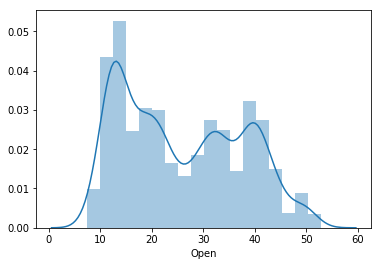

In [493]:
sns.distplot(st['Open'])
# Open,Close,High and Low Price lays most in 10-20
#Random distribution

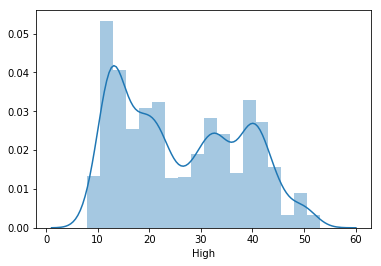

In [494]:
sns.distplot(st['High'])


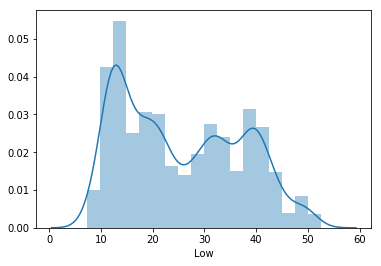

In [495]:
sns.distplot(st['Low'])

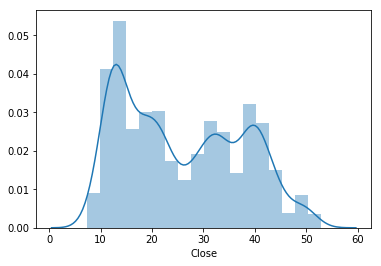

In [496]:
sns.distplot(st['Close'])

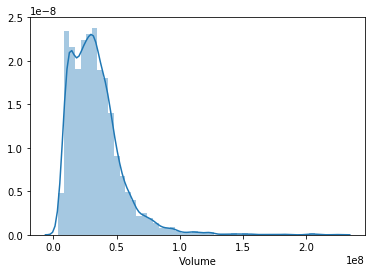

In [497]:
sns.distplot(orcl['Volume'])
# The volume lays most in 0-0.5 le8 and after 0.5, it drops quickly

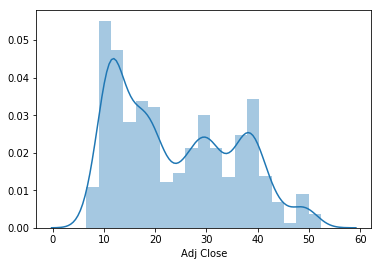

In [498]:
sns.distplot(st['Adj Close'])
#Similar to other column, the Adj Close lays most in 10-20

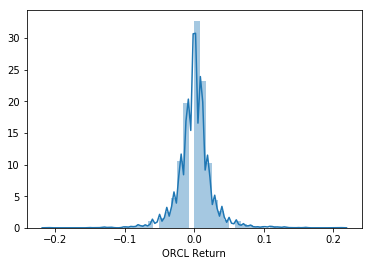

In [499]:
sns.distplot(st['ORCL Return'])
#The distribution of return is normal distribution.
#The sum of return similar to 0

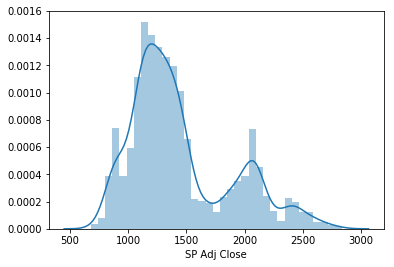

In [500]:
sns.distplot(st['SP Adj Close'])
#the SP Adj Close lays most in 1000-1500

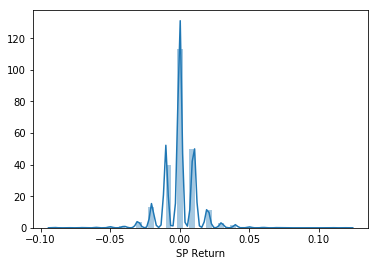

In [501]:
sns.distplot(st['SP Return'])
#The distribution of return is normal distribution.
#The sum of return similar to 0

In [502]:
#Beacuse of the huge and deep influence of the finance recession to the stock price
#I choose year 2008 as an split year to observe the difference

st["styear"]=st["Date"].dt.year
st["before finance recession"]=styear.isin(["2000","2001","2002","2003","2004","2005","2006","2007"])

/Users/mengtingyang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/mengtingyang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


An adjusted closing price is a stock's closing price on any given day of trading that has been amended to 
include any distributions and corporate actions that occurred at any time prior to the next day's open. 
The adjusted closing price is often used when examining historical returns or performing a detailed analysis 
on historical returns.

So the Adj Close is the most important price to analyse stock price

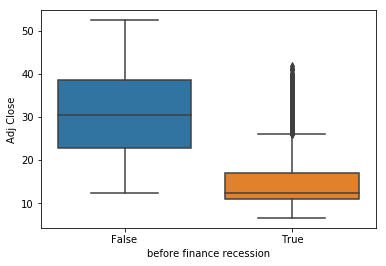

In [503]:
sns.boxplot(x="before finance recession",y="Adj Close",data=st)
#After finance recession, the price incresed much.
#So it shows that this stock has overcome the crisis and developed well
#Before the finance recession, the Adj Close price has many outliers so it means it is not stable

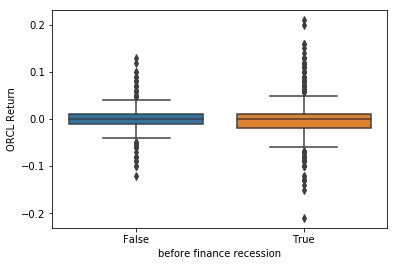

In [504]:
sns.boxplot(x="before finance recession",y="ORCL Return",data=st)
#No matter Before or After the recession, the overall return remains similar to 0,
#But before the recession, there are more outliers numbers but after the recession, the outliers become less
#It shows that this stock becomes more stable and the risk of this stock decreased

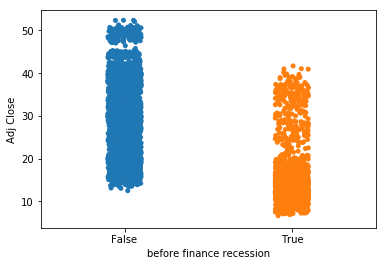

In [505]:
sns.stripplot(x="before finance recession",y="Adj Close",data=st,jitter=True)
#The length of the price ranges are almost the same, but after recession, the price increased much.
#The price after the recession lays more closely so it means the price became more stable. 
#Also, this prove that there's no unreasonable prices

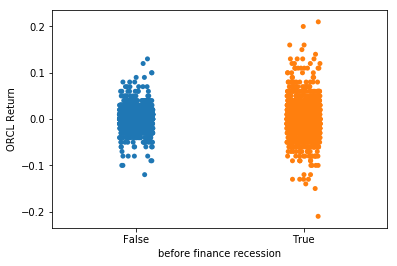

In [506]:
sns.stripplot(x="before finance recession",y="ORCL Return",data=st,jitter=True)
#Before the recession, the return has many outliers no matter return or loss
#It shows that the return before recession is not stable, more risky
#Also,20% return is a reasonable number

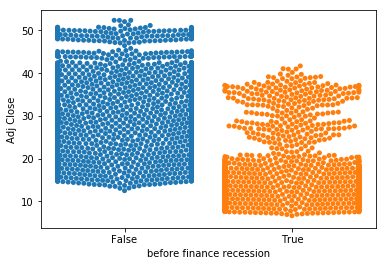

In [507]:
sns.swarmplot(x="before finance recession",y="Adj Close",data=st)
#Before recession, the price of 20 is like a split line. 
#Price which is lower than 20 is stable but after it reaches 20,it becomes more scatter and not stable
#After recession, the number of stable price increase and the split line increase to 45
#and the price higher than 45 are also more stable than the price before recession

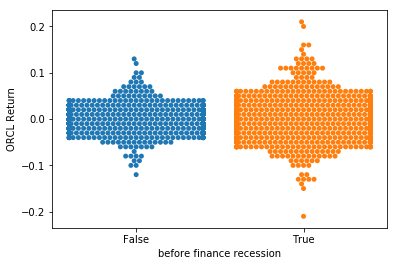

In [508]:
sns.swarmplot(x="before finance recession",y="ORCL Return",data=st)
#Before recession, the range of return is larger and there are more outliers 
#After recession, the range is smaller and it proves that it became more stable

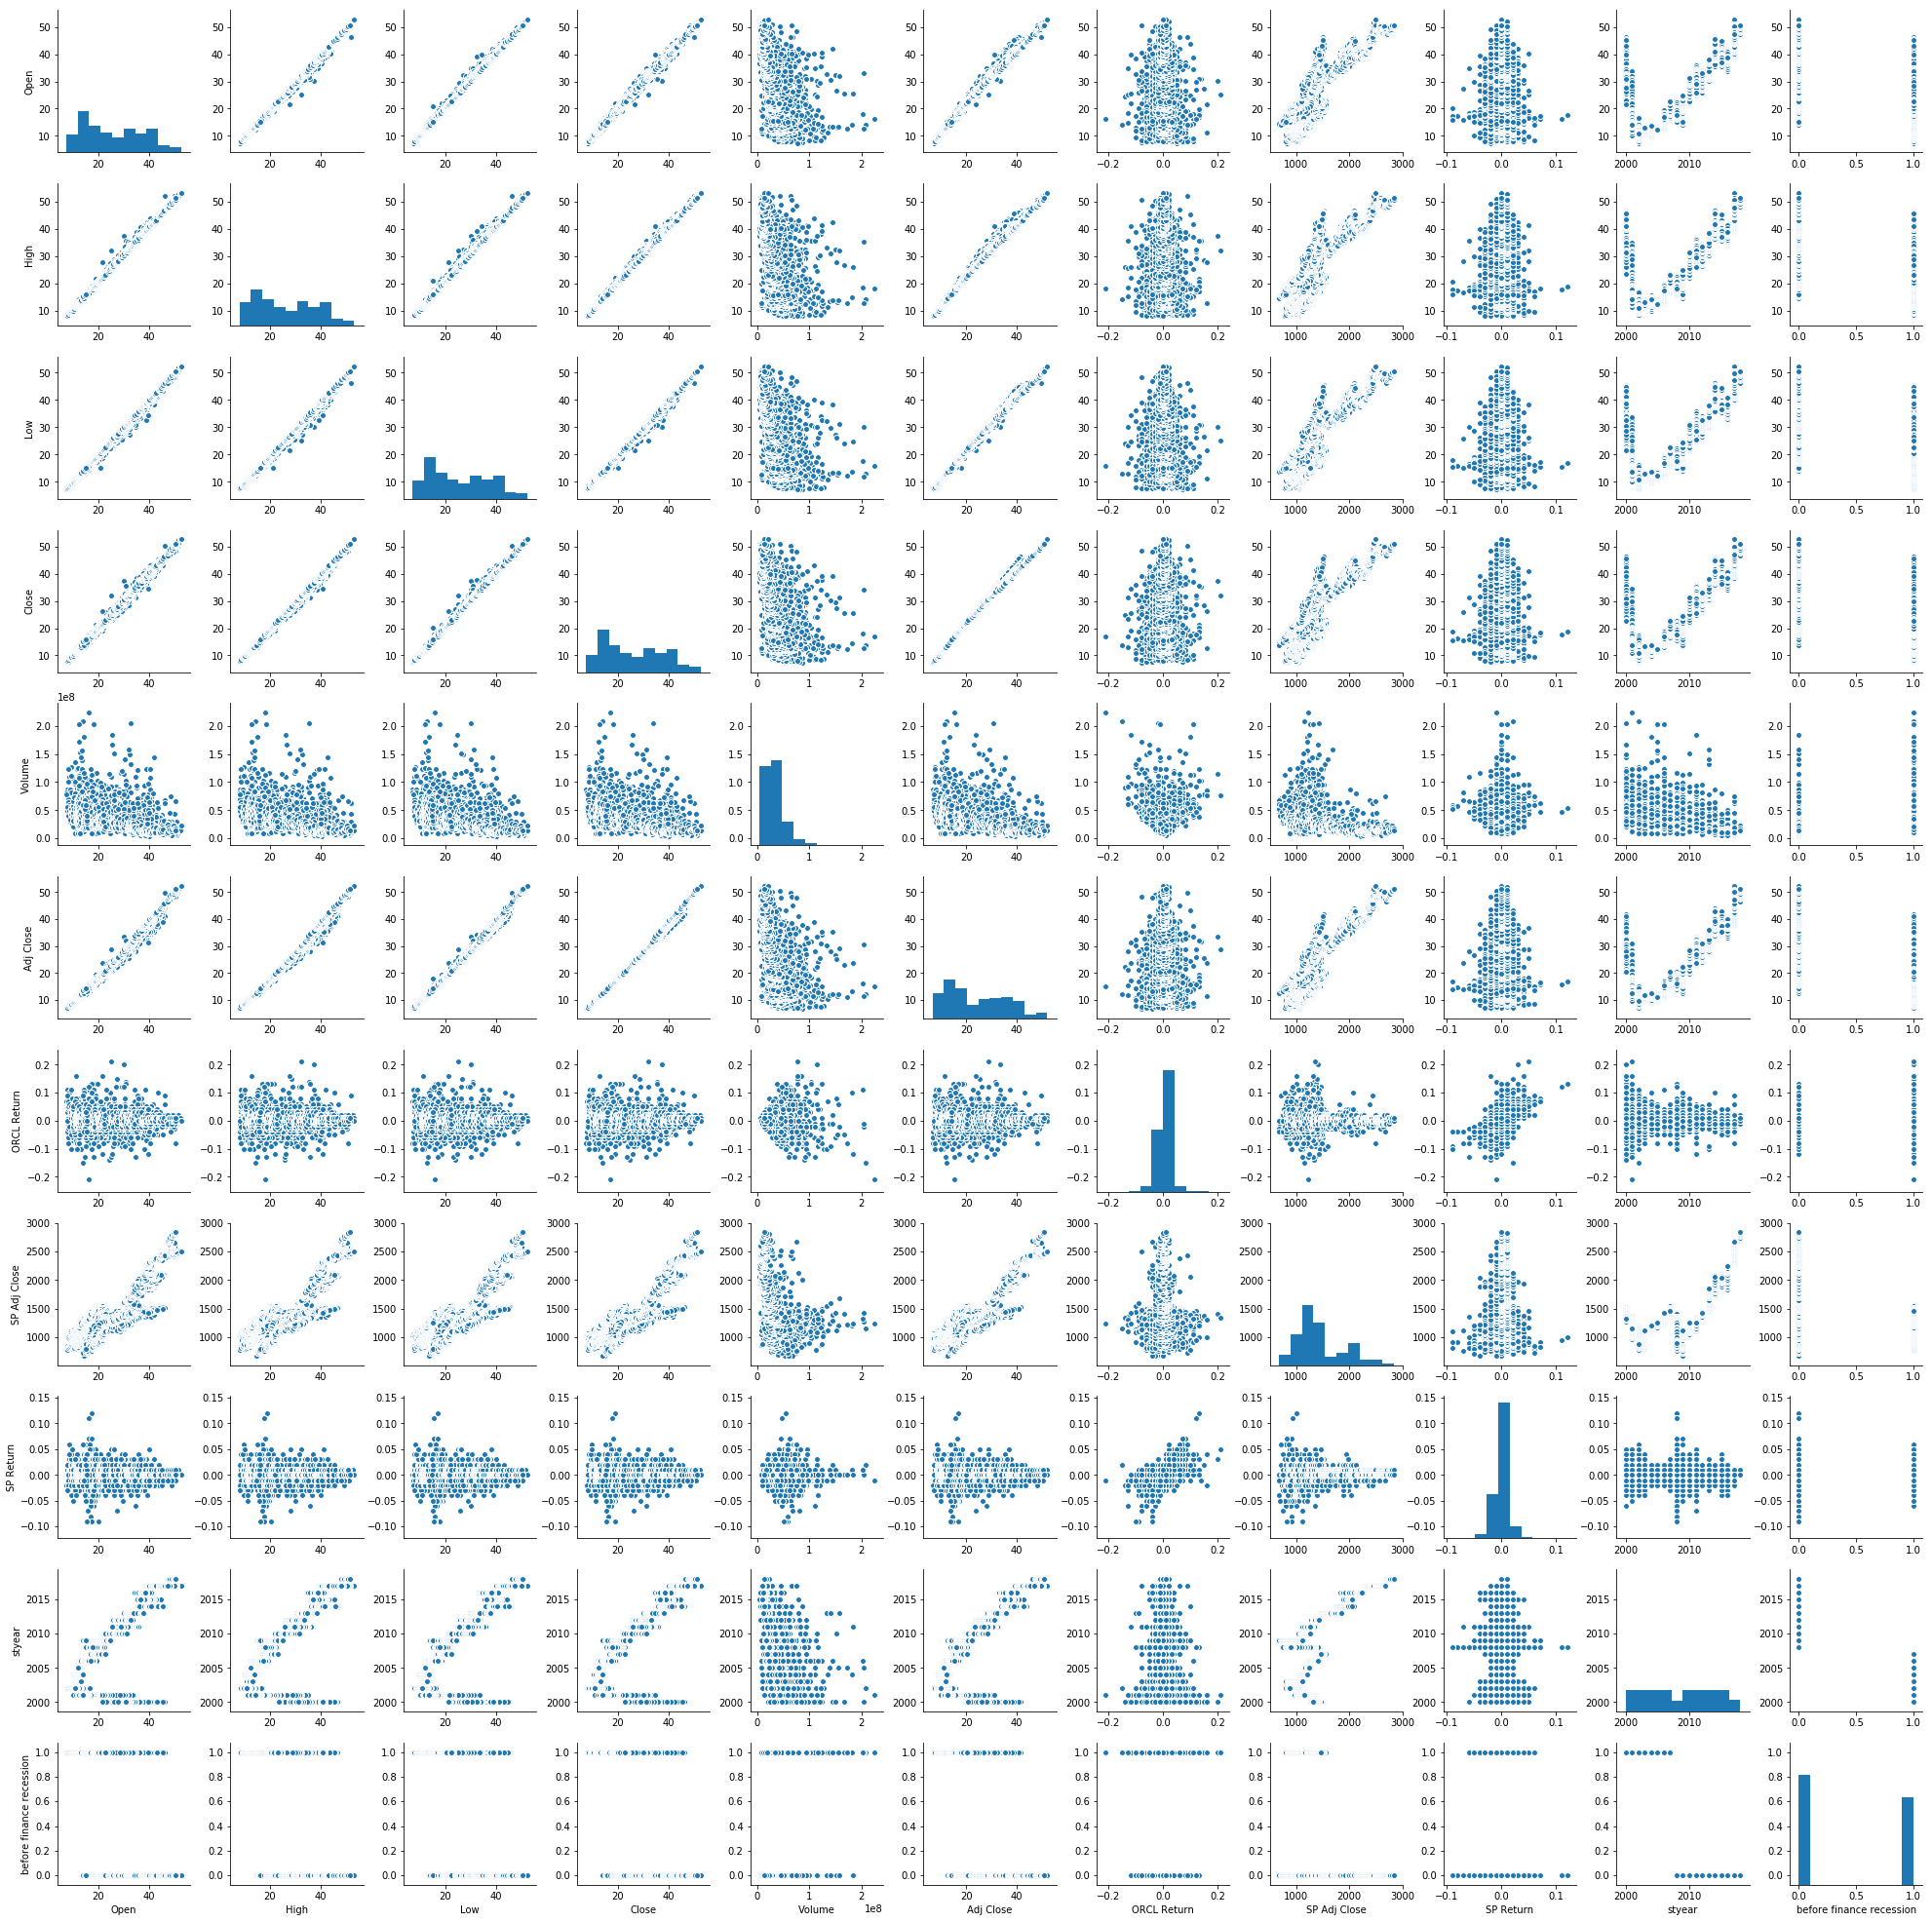

In [509]:
sns.pairplot(st)
#The price of Open, Close, High, Low and Adj Close are positively related to each other
#The return seems NOT related to the price

                          before finance recession  Adj Close  SP Adj Close
before finance recession                  1.000000  -0.675848     -0.464158
Adj Close                                -0.675848   1.000000      0.878033
SP Adj Close                             -0.464158   0.878033      1.000000


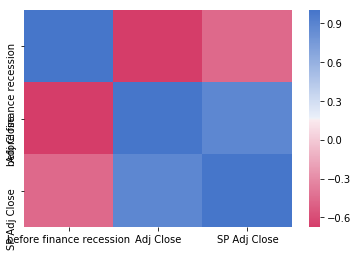

In [510]:
cmap = sns.diverging_palette(0, 255, sep=1, n=256, as_cmap=True)

correlations = st[['before finance recession','Adj Close', 'SP Adj Close']].corr()
print (correlations)
sns.heatmap(correlations, cmap=cmap)
#It shows that the Adj Close Price positively related much to SP price (nearly 0.9)
#so it means the trend of the price between ORCL and SP are same
#The price negatively related to the finance recession, so this meas the price recovers well

                          before finance recession  ORCL Return  SP Return
before finance recession                  1.000000    -0.003936  -0.013391
ORCL Return                              -0.003936     1.000000   0.593739
SP Return                                -0.013391     0.593739   1.000000


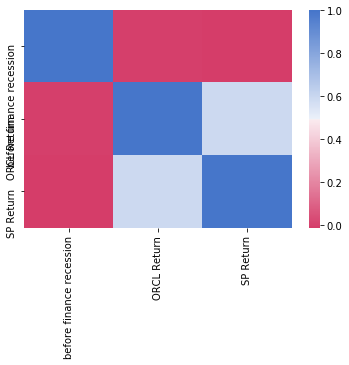

In [511]:
returncorrelations = st[['before finance recession','ORCL Return', 'SP Return']].corr()
print (returncorrelations)
sns.heatmap(returncorrelations, cmap=cmap)
#It shows that the Adj Return positively related much to SP Return but not that much(just 0.6)
#The return seems not related much to the finance recession

                          before finance recession  ORCL Return  SP Return  \
before finance recession                  1.000000    -0.003936  -0.013391   
ORCL Return                              -0.003936     1.000000   0.593739   
SP Return                                -0.013391     0.593739   1.000000   
Adj Close                                -0.675848     0.024270   0.031988   
SP Adj Close                             -0.464158     0.007463   0.029427   

                          Adj Close  SP Adj Close  
before finance recession  -0.675848     -0.464158  
ORCL Return                0.024270      0.007463  
SP Return                  0.031988      0.029427  
Adj Close                  1.000000      0.878033  
SP Adj Close               0.878033      1.000000  


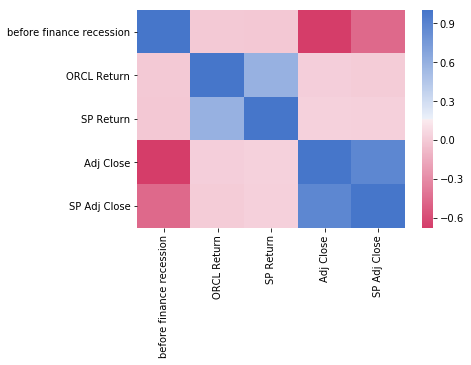

In [512]:
allcorrelations = st[['before finance recession','ORCL Return', 'SP Return','Adj Close', 'SP Adj Close']].corr()
print (allcorrelations)
sns.heatmap(allcorrelations, cmap=cmap)
#this proves that the price don't have too much relationship with return

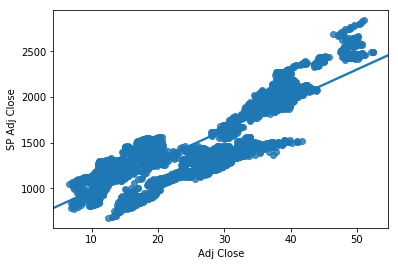

In [513]:
sns.regplot(x="Adj Close",y="SP Adj Close",data=st,x_jitter=.05)
#When the price increases close to 50, they do not obey the original line any more

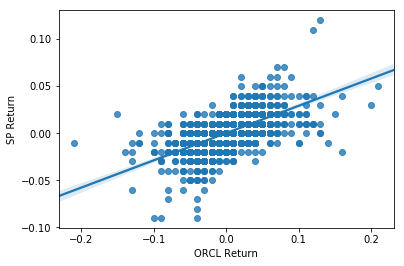

In [514]:
sns.regplot(x="ORCL Return",y="SP Return",data=st)
#When return is more than 0.1 or less than -0.1, they become less realted

In [515]:
st["big_increase"]=st["ORCL Return"]>0.1
st["big_decrease"]=st["ORCL Return"]<-0.1

/Users/mengtingyang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/mengtingyang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


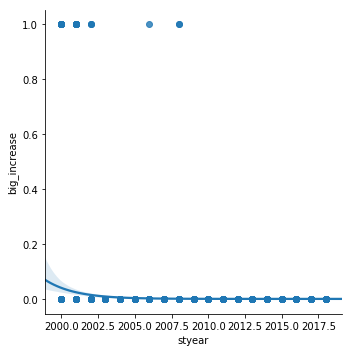

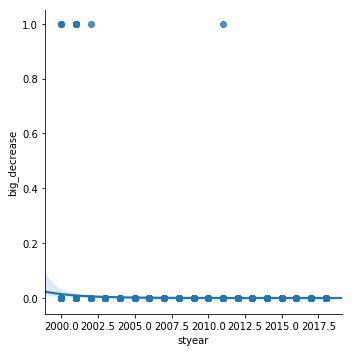

In [516]:
sns.lmplot(x="styear",y="big_increase",data=st,logistic=True)
sns.lmplot(x="styear",y="big_decrease",data=st,logistic=True)
#Before finance ression(year 2008), there are several big increase and big decrease of the orcl return
#This fluctuation comes from some big events in the company
#In the year of 2000, the company had to compete with the company which was business partner before.
#As a result, the number of the order decrease dramatically 
#In the year of 2007, they purchased another company

In [517]:
plt.rcParams['figure.figsize'] = (35, 20)

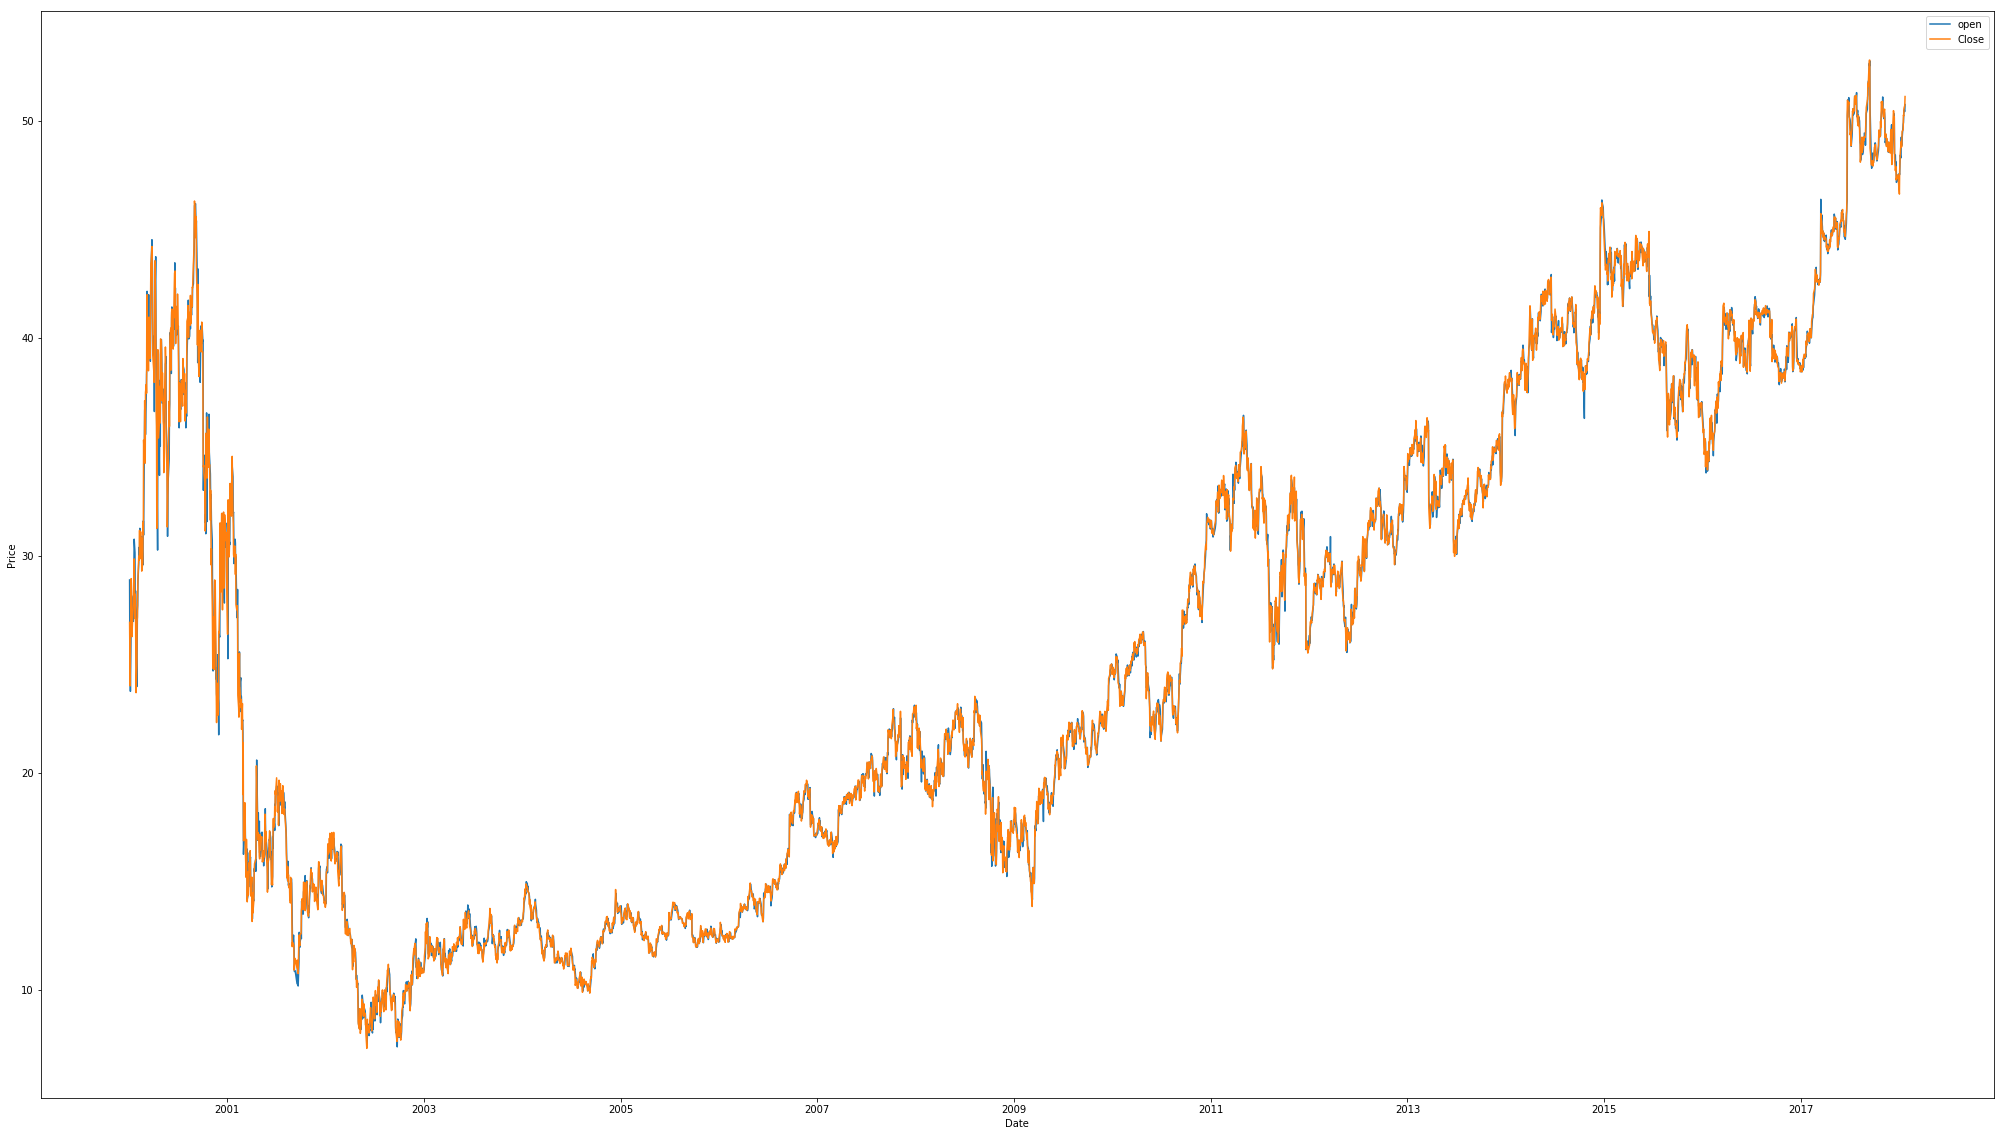

In [518]:
plt.plot(st["Date"],st["Open"],label="open")
plt.plot(st["Date"], st["Close"], label="Close")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()
#This graphic shows that the open and close price of ORCL decreased dramatically during the year between 2001 and 2006
#After  2007, they started to purchase other companies and the price started to increase 
#During the 2008-2009. Due to the finance recession, the price decreased again but not mumch
#Then after 2009, the price increase again and althogh there are still several low price
#The price is still an increase trend

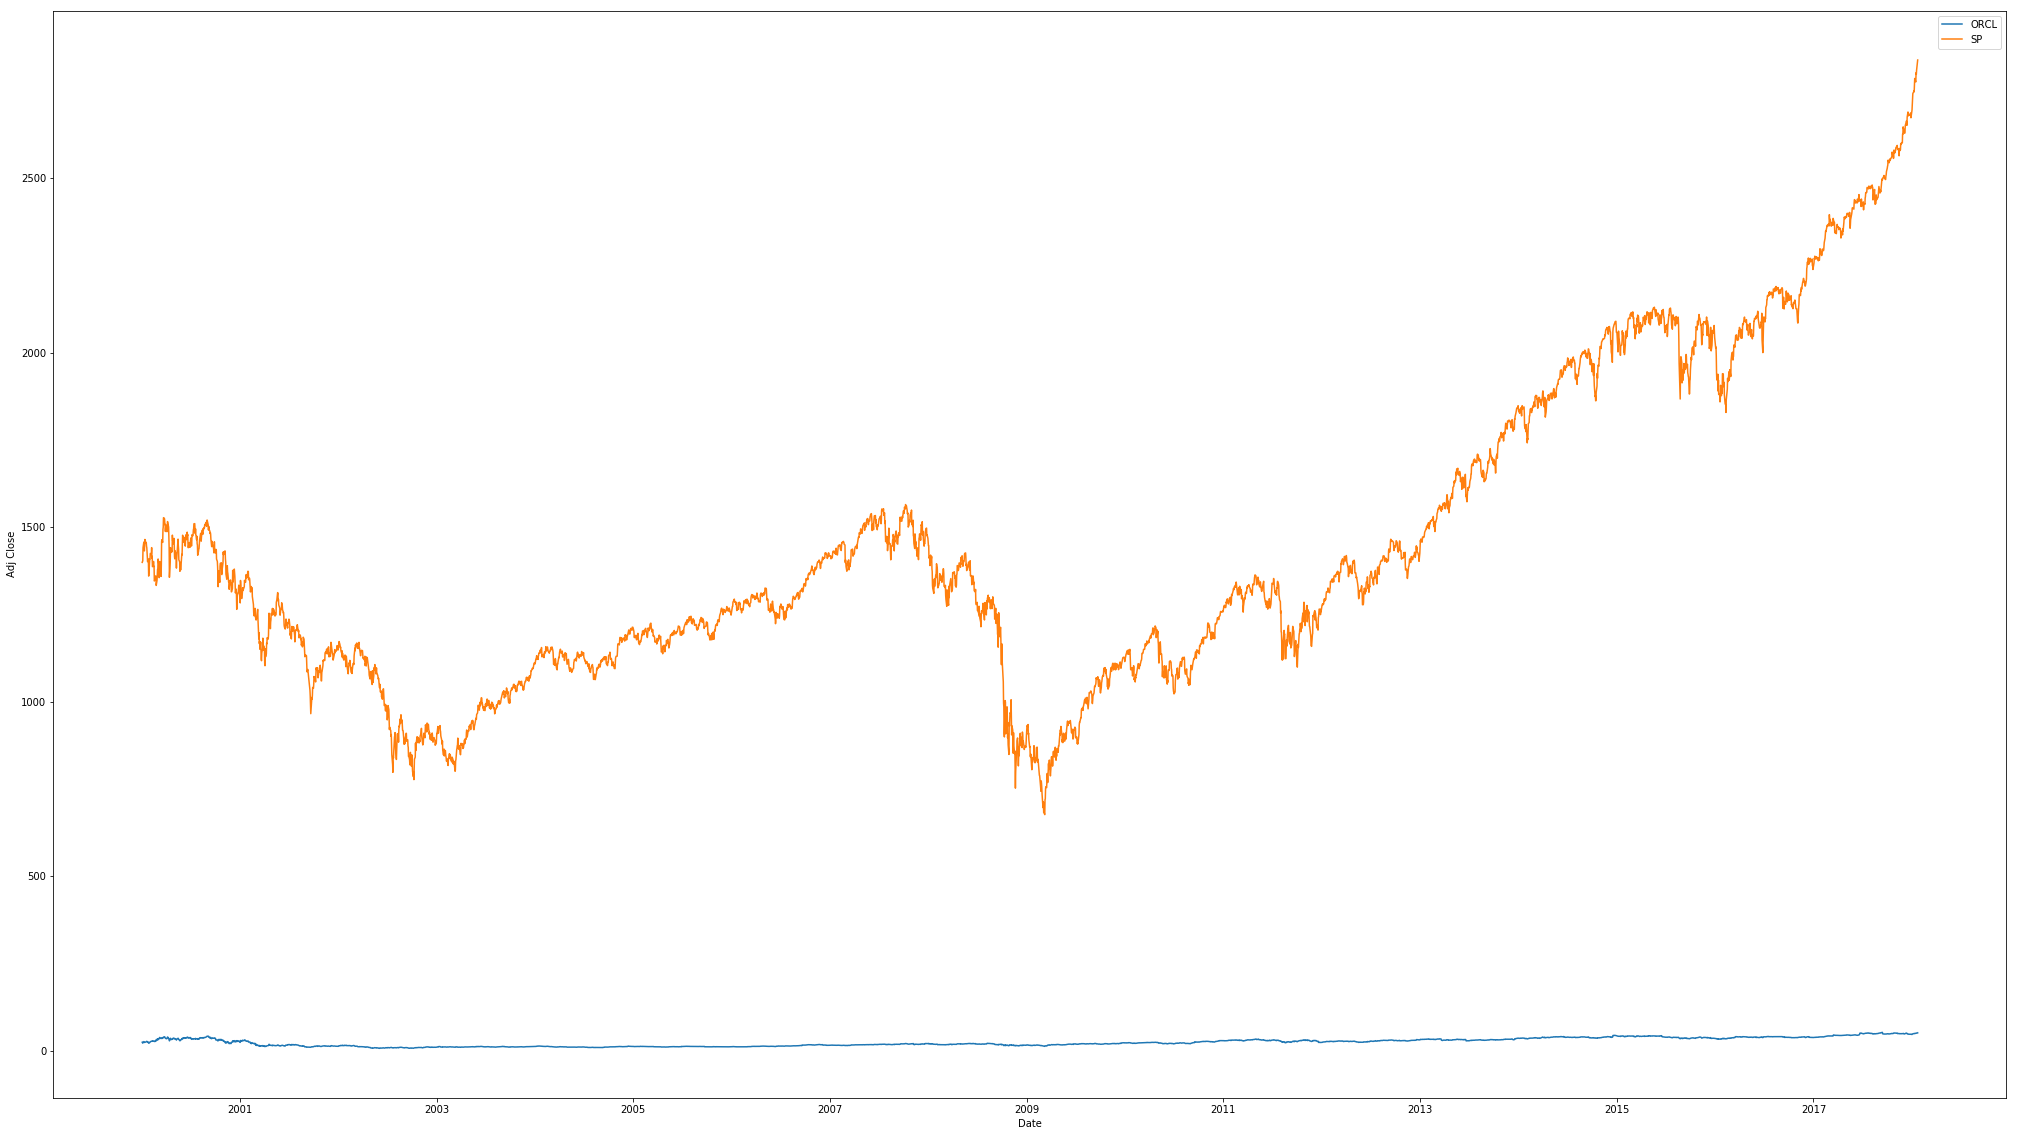

In [519]:
plt.plot(st["Date"],st["Adj Close"],label="ORCL")
plt.plot(st["Date"], st["SP Adj Close"], label="SP")
plt.xlabel("Date")
plt.ylabel("Adj Close")
plt.legend()
plt.show()
#Because the price of the ORCL is much lower than SP price
#so compare to the SP price, it is more stable

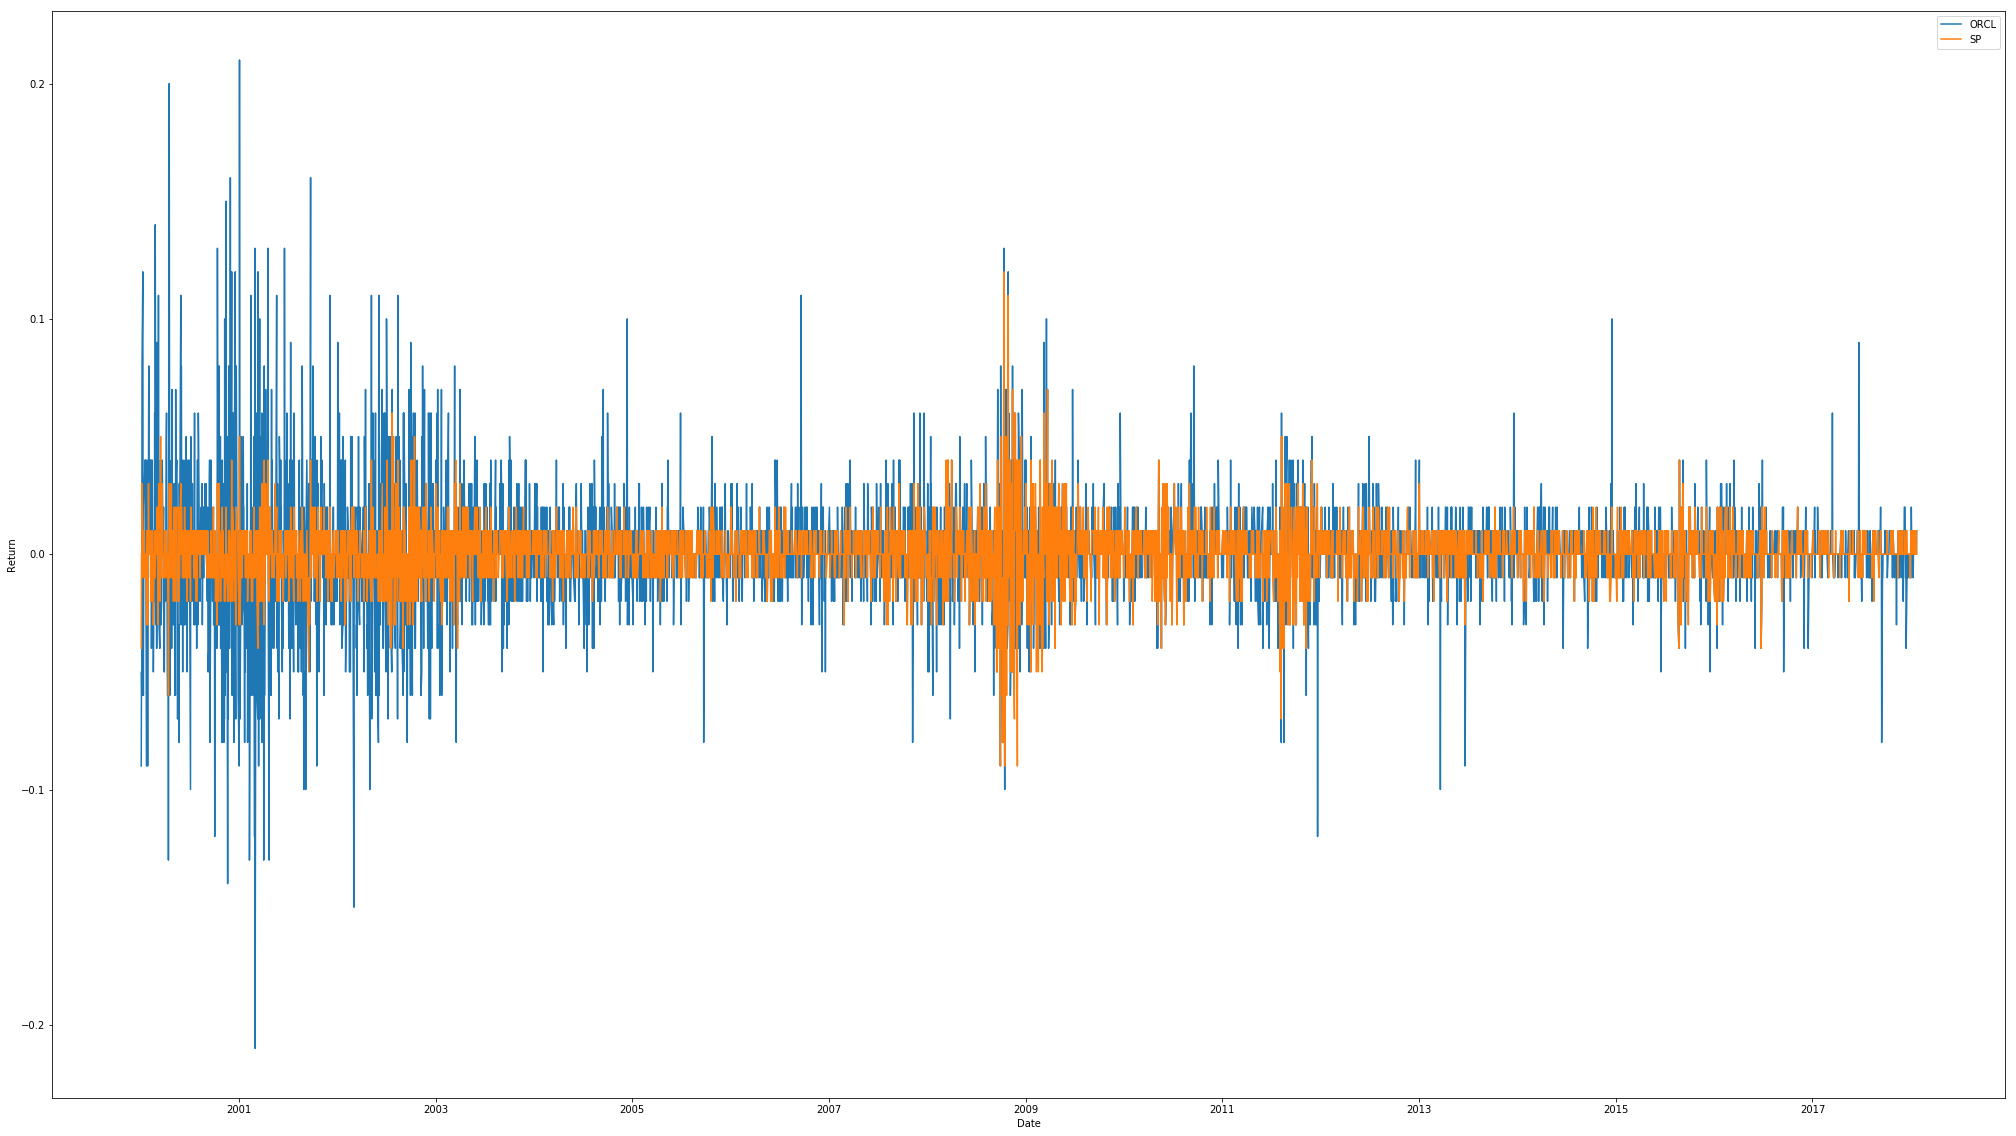

In [520]:
plt.plot(st["Date"],st["ORCL Return"],label="ORCL")
plt.plot(st["Date"], st["SP Return"], label="SP")
plt.xlabel("Date")
plt.ylabel("Return")
plt.legend()
plt.show()
#Before year 2008, the return of ORCL is stable compare to the SP 
#However, when it comes to 2008, the return is not much stable( may be due to the finance recession)
#After 2008, it become stable again

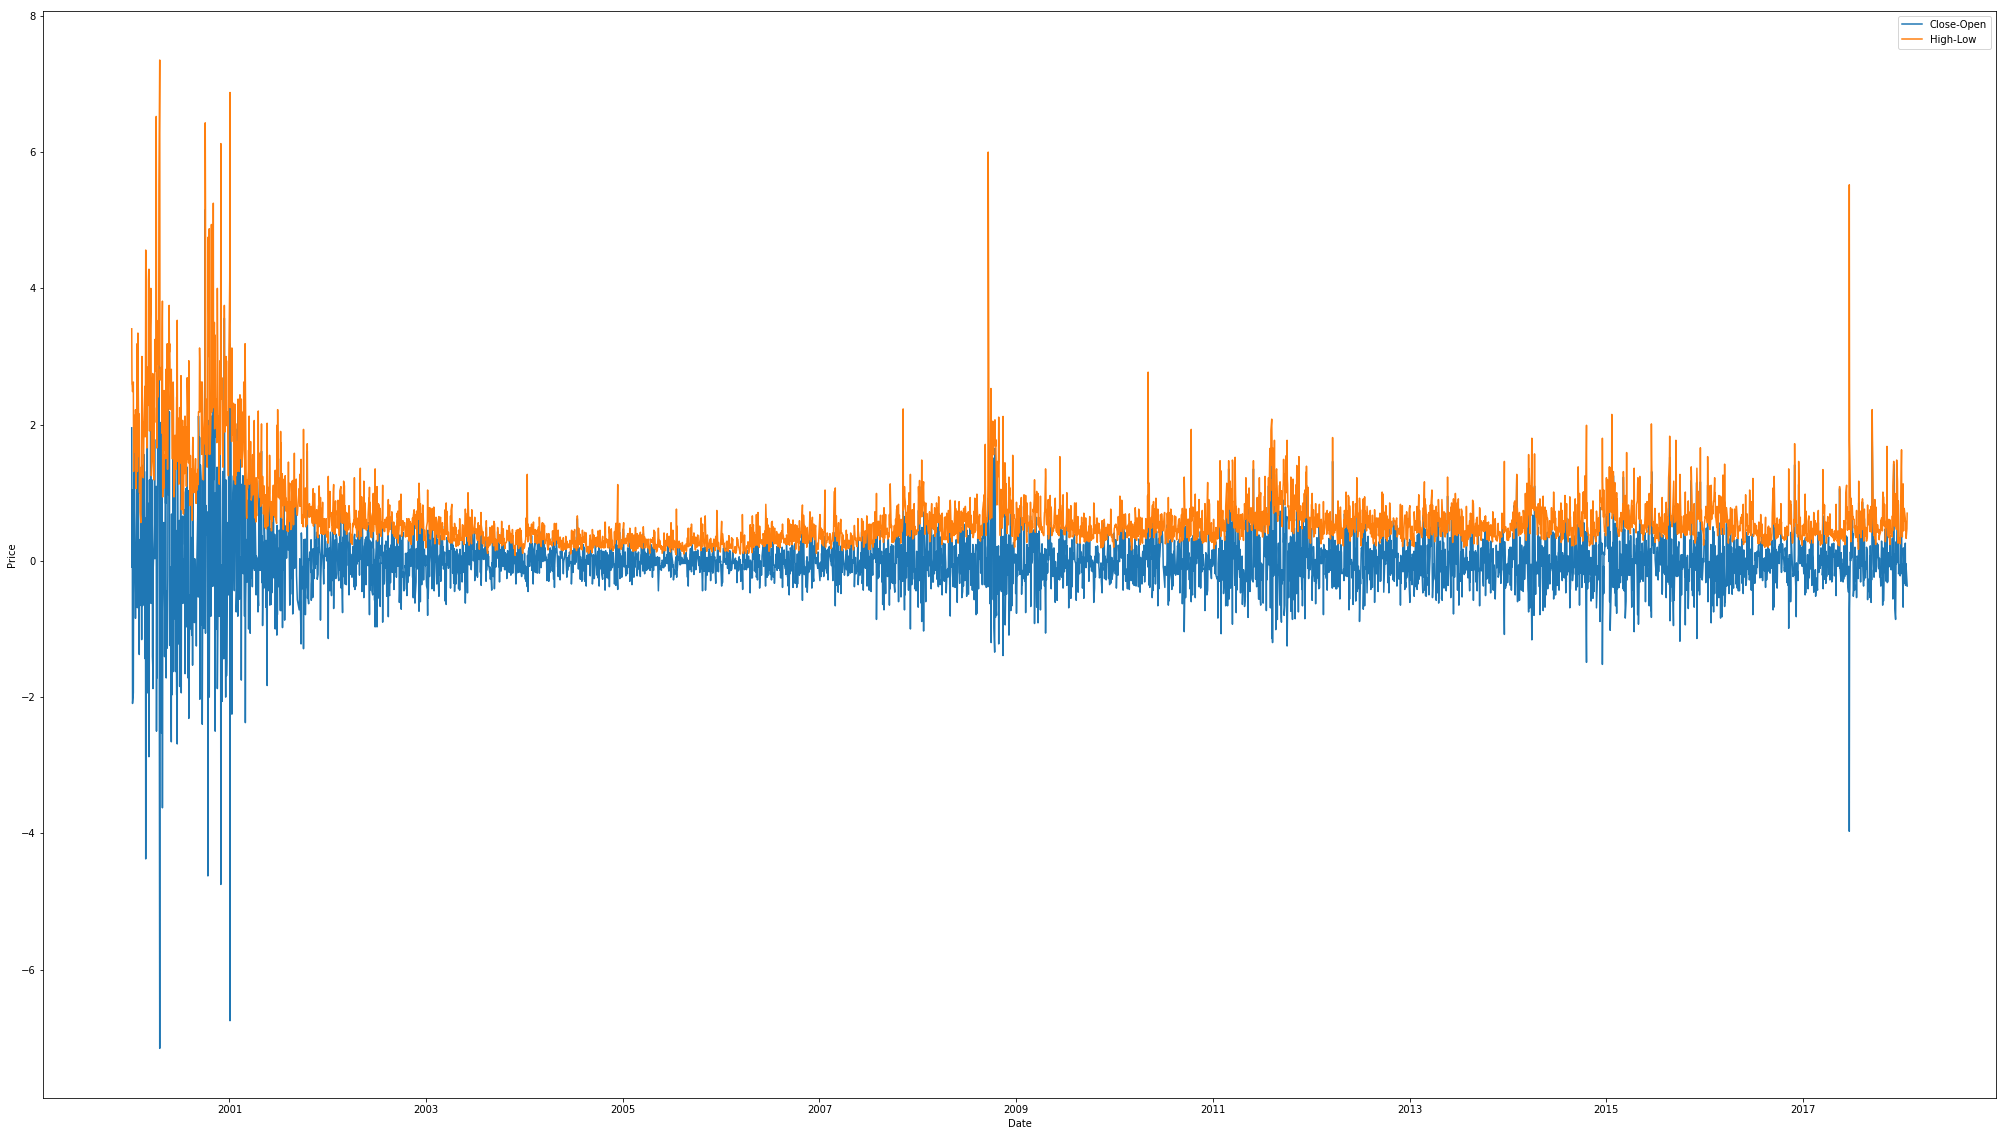

In [521]:
plt.plot(st["Date"], st["Open"] - st["Close"], label="Close-Open")
plt.plot(st["Date"], st["High"] - st["Low"], label="High-Low")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()
#Compare to return percent, the daily return price number is a little bit different
#Before 2002, they all fluctuate much and then become stable until 2008 and then became stable again

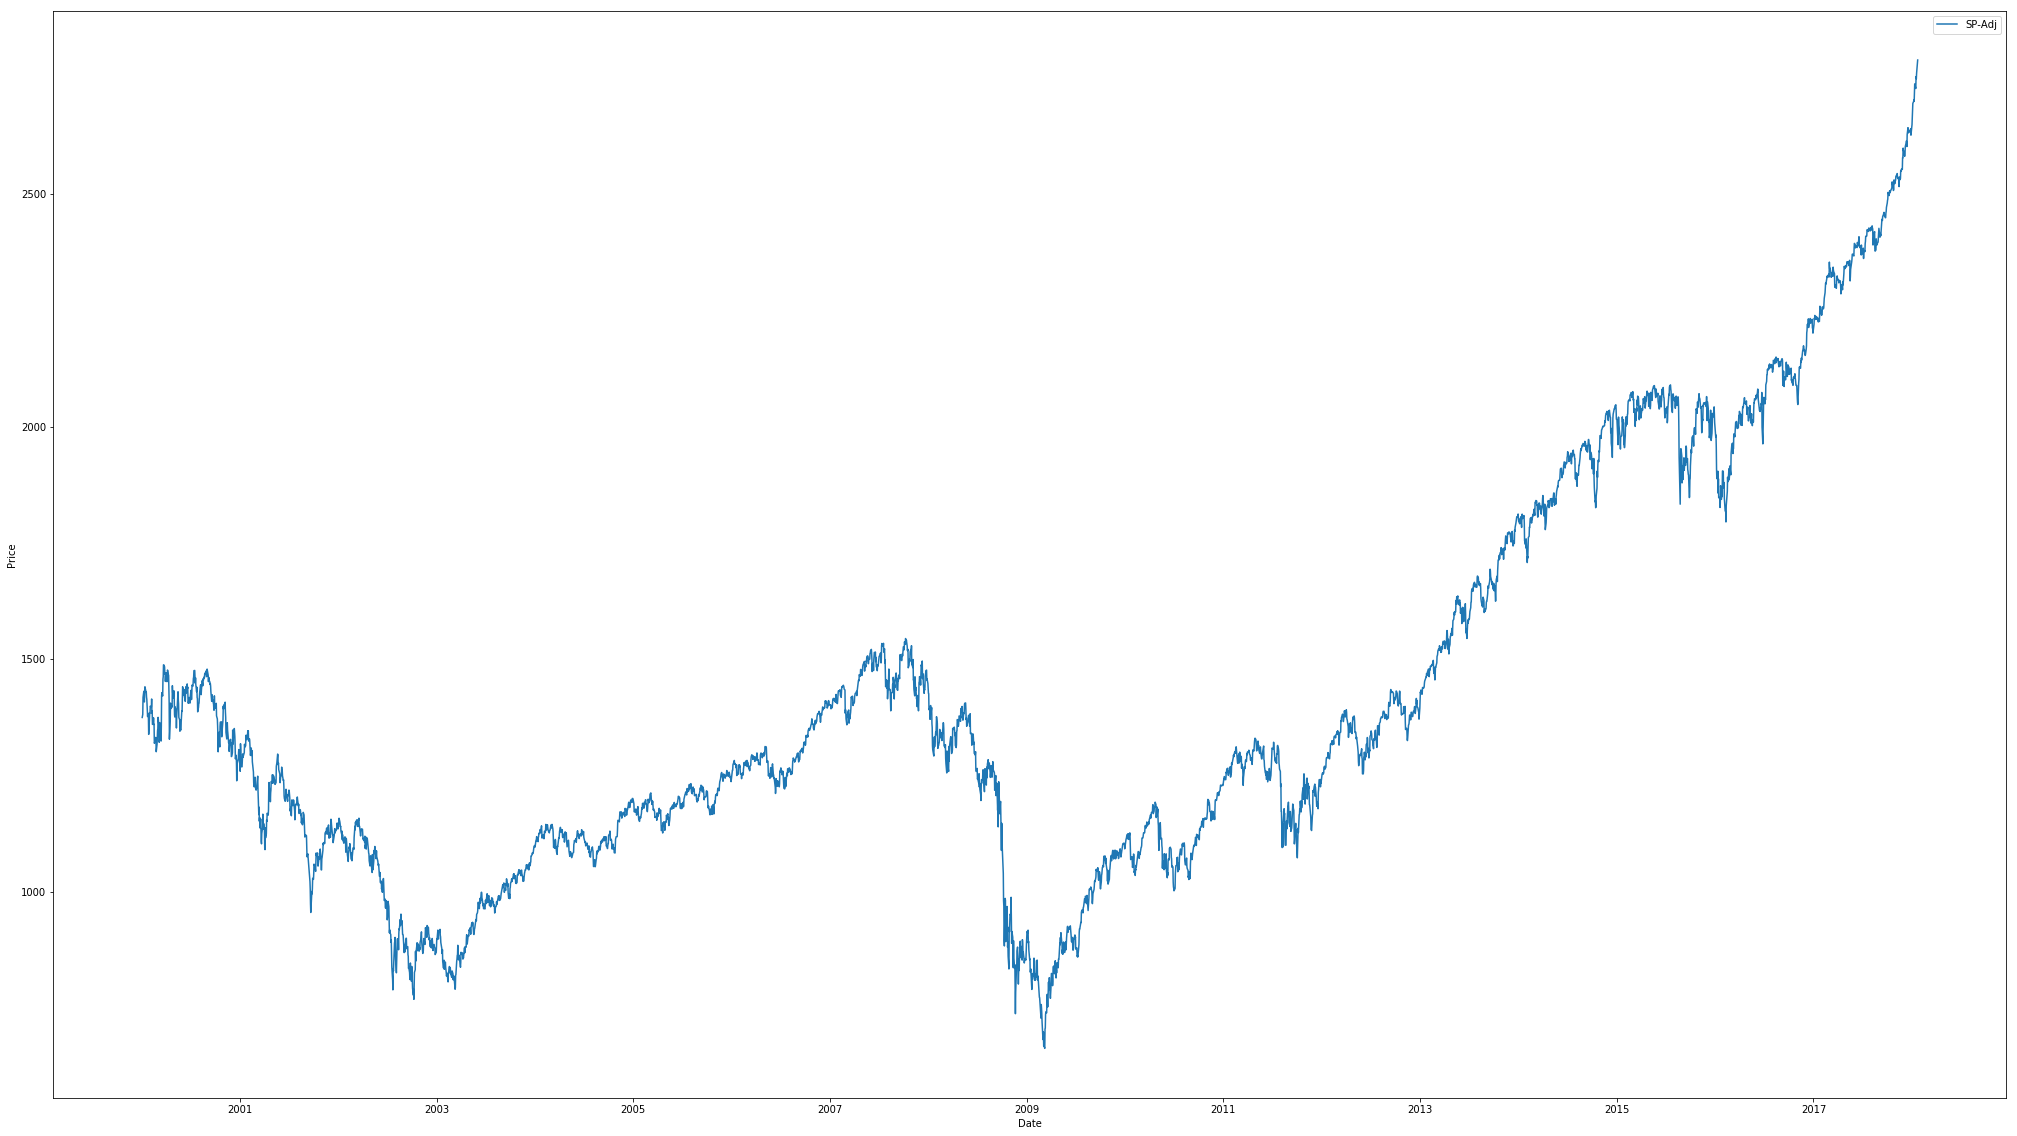

In [522]:
plt.plot(st["Date"], st["SP Adj Close"] - st["Adj Close"], label="SP-Adj")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()
#This graphic shows the price difference between ORCL and SP,
#The difference become much larger recently and the minimun came in 2008-2009

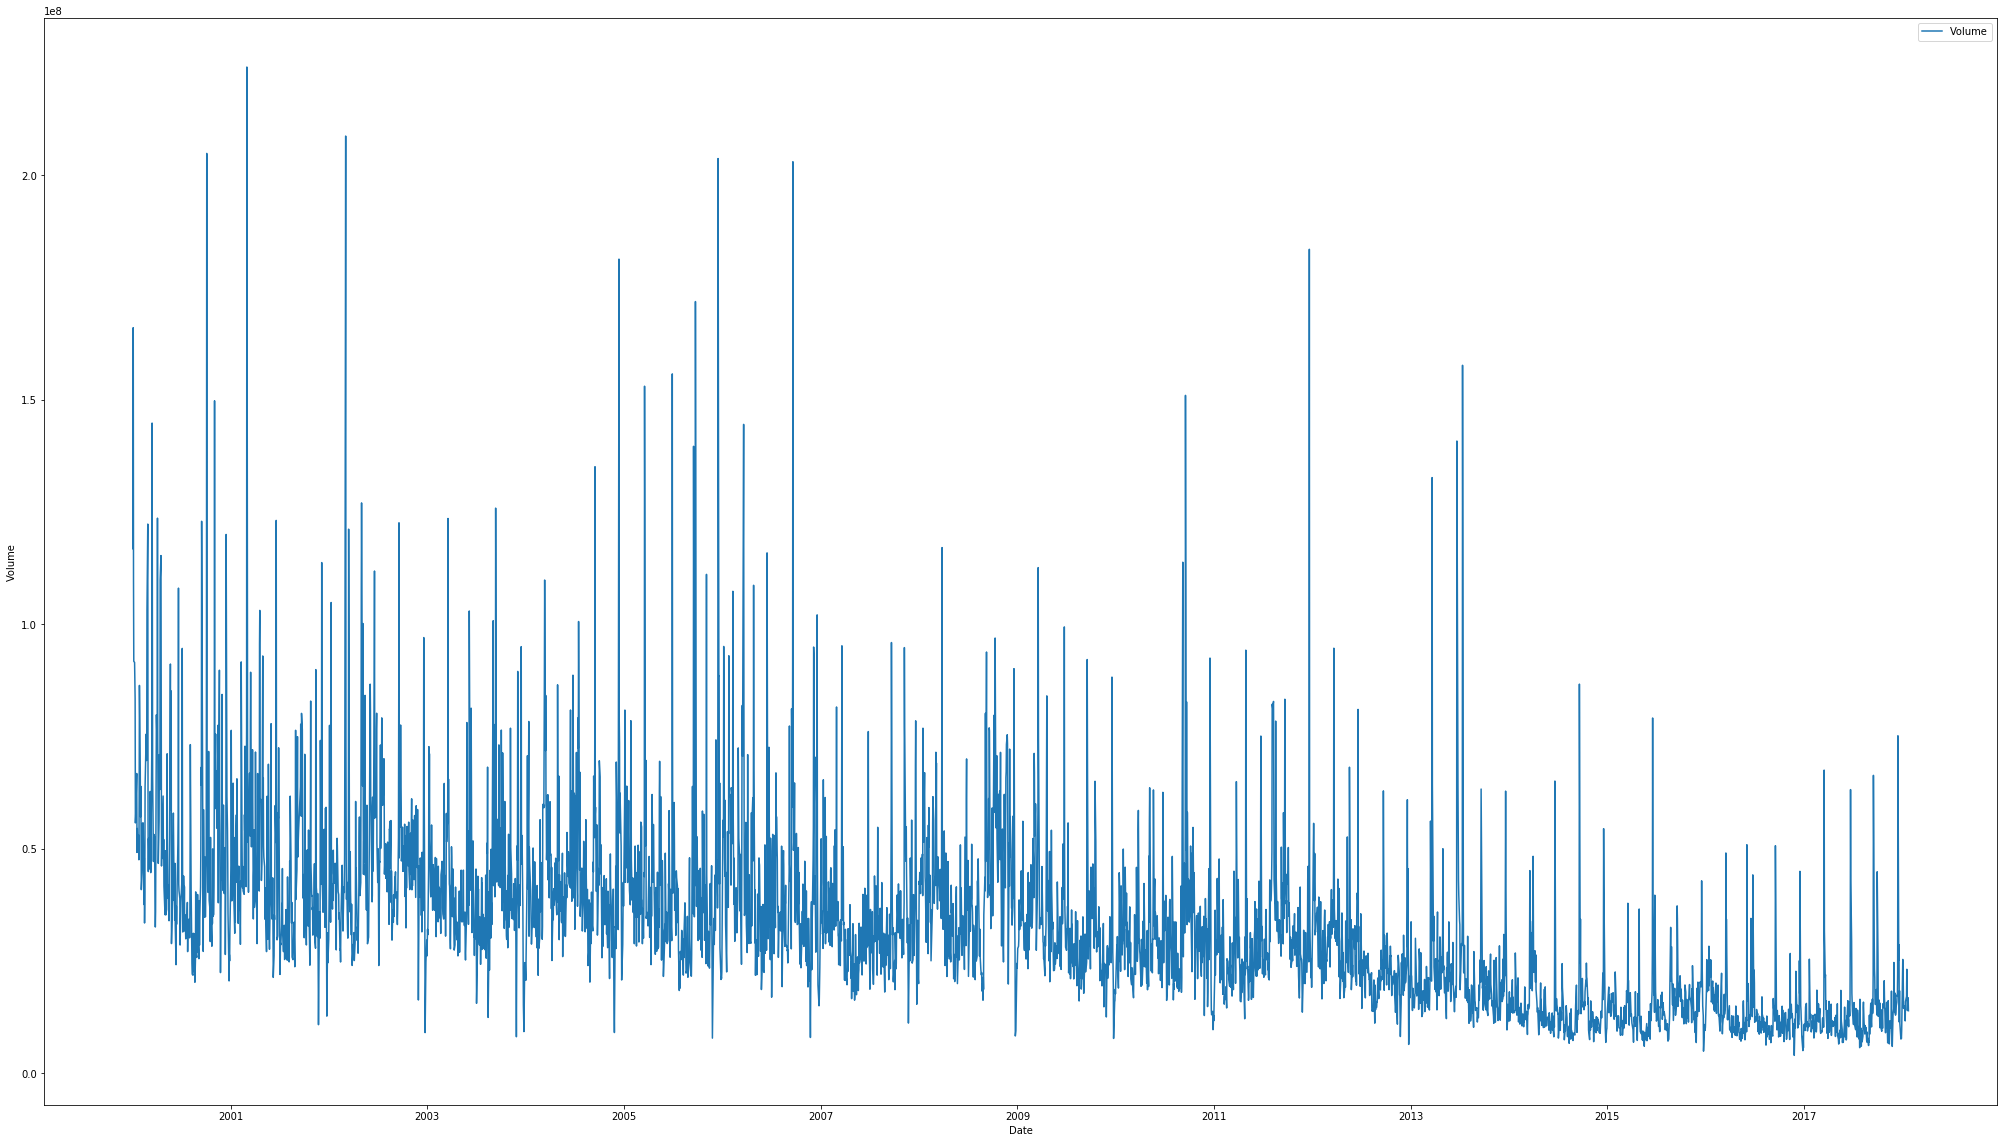

In [523]:
plt.plot(st["Date"], st["Volume"], label="Volume")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()
plt.show()
plt.rcParams['figure.figsize'] = (50, 30)
#The number of volume and the fluctuation of the volume both decrease recently